## Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Dataframe

In [2]:
#import path of dataframe
path = r"C:\Users\bhimc\Documents\Instacart Basket Analysis (Career Foundry Rekha)"

In [3]:
path

'C:\\Users\\bhimc\\Documents\\Instacart Basket Analysis (Career Foundry Rekha)'

In [4]:
# Import df_merged_all dataframe
df_merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
df_merged_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1.0,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2.0,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3.0,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4.0,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5.0,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## "Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart."

<Axes: xlabel='orders_day_of_week'>

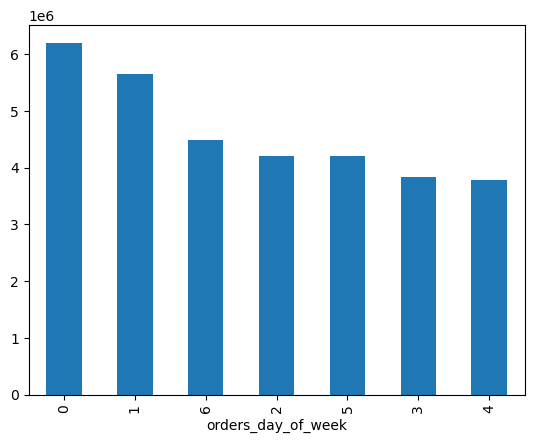

In [6]:
# Create a bar chart
df_merged_all['orders_day_of_week']. value_counts().plot.bar()

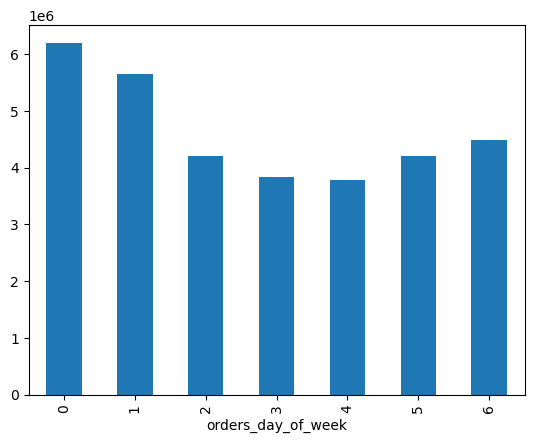

In [7]:
# Bar Chart using "sort_index()" function for "orders_day_of_week"
bar = df_merged_all['orders_day_of_week']. value_counts().sort_index().plot.bar()

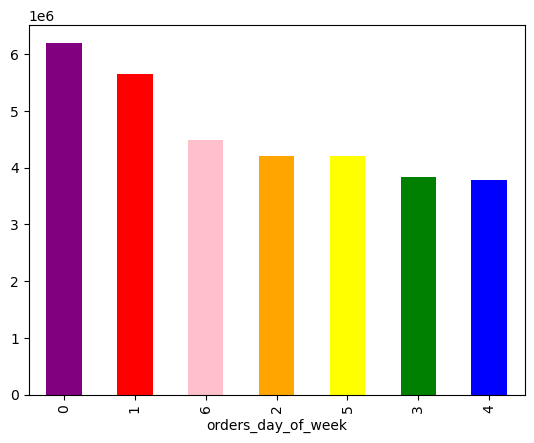

In [8]:
# adding "colors" argument to the bar chart 
bar = df_merged_all['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Exporting Charts outside of jupyter

In [9]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

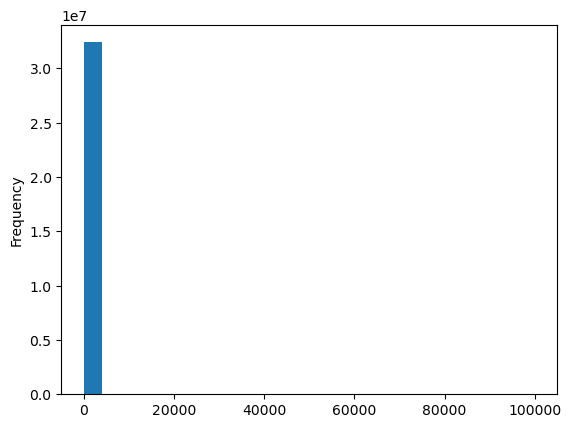

In [10]:
# Creating Histograms of "Prices" Column
df_merged_all['prices'].plot.hist(bins = 25)

In [11]:
# Checking the Data Consistency using "Describe()" function for "Prices" column
df_merged_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956361e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
####To further investigate, checks for each specific statistic:
df_merged_all['prices'].mean()

11.980228

In [13]:
df_merged_all['prices'].median()

7.400000095367432

In [14]:
df_merged_all['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

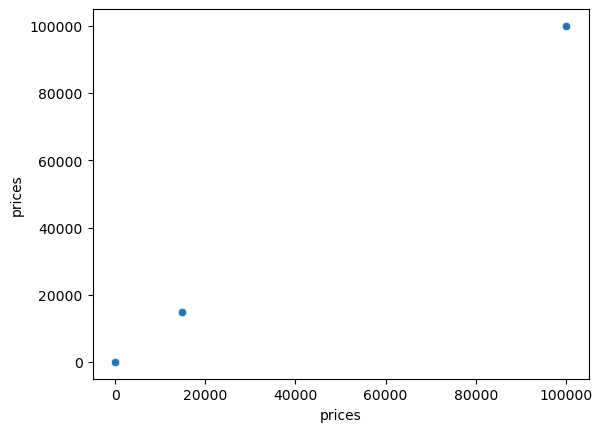

In [15]:
# "use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis 
#use scatterplots to visualize the distribution of data points in order to identify any outliers.
sns.scatterplot(x = 'prices', y = 'prices', data = df_merged_all)

In [16]:
# Using "loc" function of prices column for missing values "np.nan"
df_merged_all.loc[df_merged_all['prices'] >100, 'prices'] = np.nan

In [17]:
df_merged_all['prices'].max()

25.0

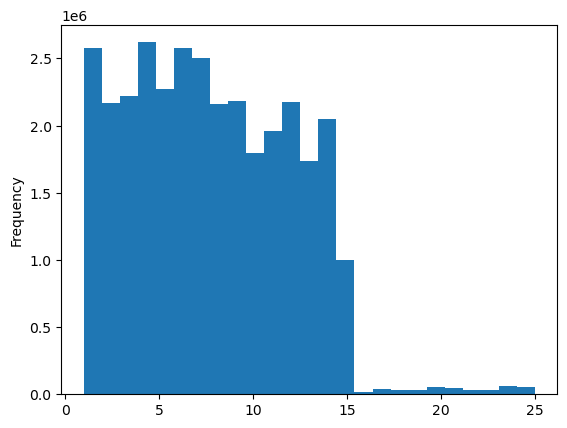

In [18]:
# Creating Histogram of 'prices'
hist = df_merged_all['prices'].plot.hist(bins = 25)

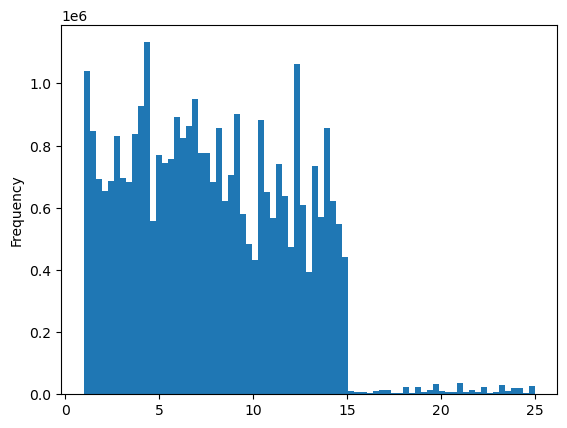

In [19]:
hist_2 = df_merged_all['prices'].plot.hist(bins = 75)

## Export the Histogram

In [20]:
# Export the Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [21]:
# create a subsets of df_merged-all dataframe
df = df_merged_all[:2000000]

In [22]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1.0,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2.0,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3.0,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4.0,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5.0,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,943182,11310,7.0,2,8,18.0,7987,2,1,Hazelnut Spread with Cocoa,...,Terry,Barajas,Male,Pennsylvania,57,11/1/2017,0,single,50117,both
1999996,2758992,11310,14.0,3,14,7.0,7987,1,1,Hazelnut Spread with Cocoa,...,Terry,Barajas,Male,Pennsylvania,57,11/1/2017,0,single,50117,both
1999997,1052371,11310,8.0,4,8,23.0,14467,4,0,Sweet Baguette,...,Terry,Barajas,Male,Pennsylvania,57,11/1/2017,0,single,50117,both
1999998,1495411,11310,13.0,3,16,7.0,18023,4,0,Organic Coconut Water,...,Terry,Barajas,Male,Pennsylvania,57,11/1/2017,0,single,50117,both


In [23]:
# Create the list with the random numbers

In [24]:
# Create the seed(4)
np.random.seed(4)

In [25]:
# Create a list holding True/False values to the test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_merged_all)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [28]:
# Store two sample in the dataframes big: 70% and small: 30%
big = df_merged_all[dev]
small = df_merged_all[~dev]

In [29]:
# Checking the result of expected in two sample subsets

In [30]:
len(df_merged_all)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


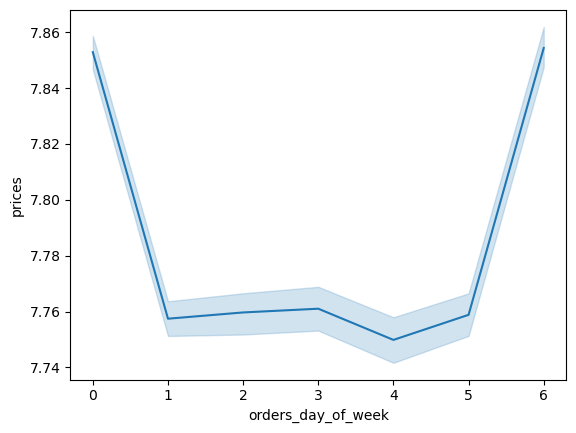

In [33]:
#  Create a Line Chart of 'orders_day_of_week' and 'prices'
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

### Export the Line Chart

In [34]:
# Exporting the line chart of 'orders_day_of_week' and 'prices'
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))

# Task 4.9 Part 2

## "Create a histogram of the “order_hour_of_day” column."

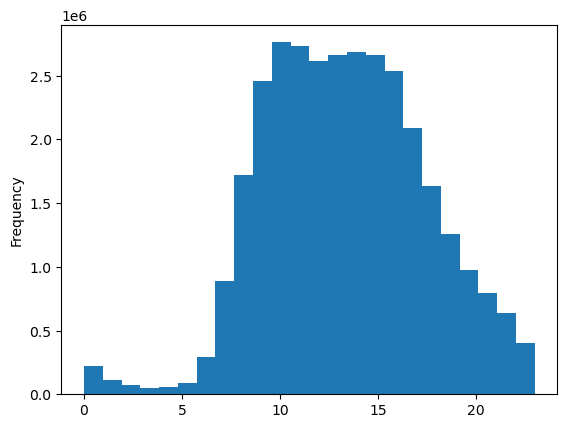

In [35]:
# Create a histogram
hist = order_hour_of_day = df_merged_all['order_hour_of_day'].plot.hist(bins =24)

In [36]:
# Export the Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

### The Histogram shows that the highest peak hours for order are from about 9 a.m. to 6 p.m. , and after 6 p.m orders begin to fall till in the morning.

## "Create a bar chart from the “loyalty_flag” column."

##### creating a loyalty flag for existing customers using the transform() and loc() functions.

In [37]:
# Split the data into groups based on the “user_id” column.
#Apply the transform() function on the “order_number” column to generate the maximum orders for each user.
#Create a new column, “max_order,” into which you’ll place the results of your aggregation.
df_merged_all['max_order'] = df_merged_all.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\bhimc\AppData\Local\Temp\ipykernel_16440\3629489187.py:4: FutureWarning: The provided callable <function amax at 0x0000021F5DBB1A80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_merged_all['max_order'] = df_merged_all.groupby(['user_id'])['order_number'].transform(np.max)


#### use loc() function to create a loyalty_flag column with given criteria

In [38]:
df_merged_all.loc[df_merged_all['max_order'] >40, 'loyalty_flag'] = 'Loyal customer'

In [39]:
df_merged_all.loc[(df_merged_all['max_order'] <=40) & (df_merged_all['max_order'] >10), 'loyalty_flag'] = 'Regular customer'

In [40]:
df_merged_all.loc[df_merged_all['max_order'] <=10, 'loyalty_flag'] = 'New customer'

In [41]:
# Check the Frequency of new "loyalty_flag" using Value_counts() Function
df_merged_all['loyalty_flag']. value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

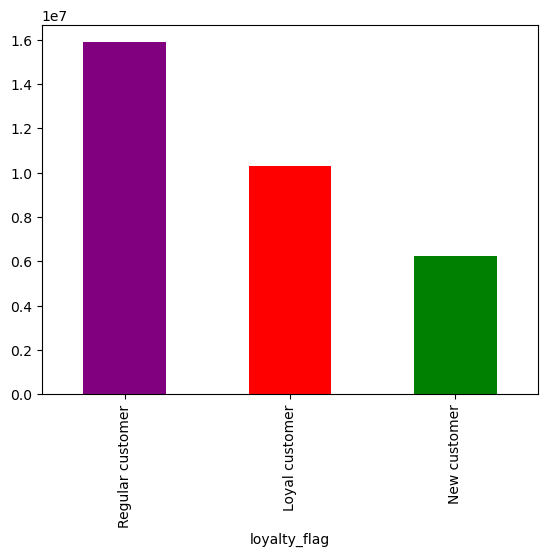

In [42]:
# Create a bar chart from the loyalty_flag column
bar = loyalty_flag = df_merged_all['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'green'])

In [43]:
# Export the Histogram
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Loyalty_flag.png'))

## "Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day"

In [44]:
# Create the list with the random numbers
# Create the seed(4)
np.random.seed(4)

In [45]:
# Create a list holding True/False values to the test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_merged_all)) <= 0.7

In [46]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [47]:
# Store two sample in the dataframes big: 70% and small: 30%
big = df_merged_all[dev]
small = df_merged_all[~dev]

In [48]:
# Checking the result of expected in two sample susets

In [49]:
len(df_merged_all)

32404859

In [50]:
len(big) + len(small)

32404859

In [71]:
df_5_hour_spend = small[['order_hour_of_day','prices']]

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


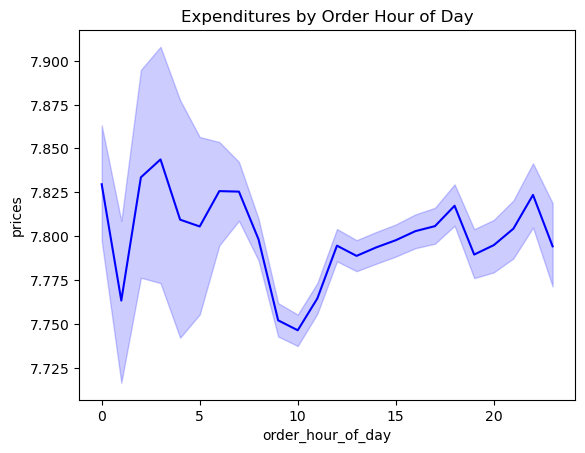

In [69]:
# #  Create a  Sample 30% Line Chart of 'orders_hour_of_day' and 'prices'
plt.title('Expenditures by Order Hour of Day')
line_hour = sns.lineplot(data = df_5_hour_spend, x = 'order_hour_of_day',y = 'prices', color='blue')

In [70]:
line_hour.figure.savefig(os.path.join (path, '04 Analysis/Visualizations/line_hour_spend.png'))

In [51]:
df_3 = small[['orders_day_of_week', 'prices']]

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


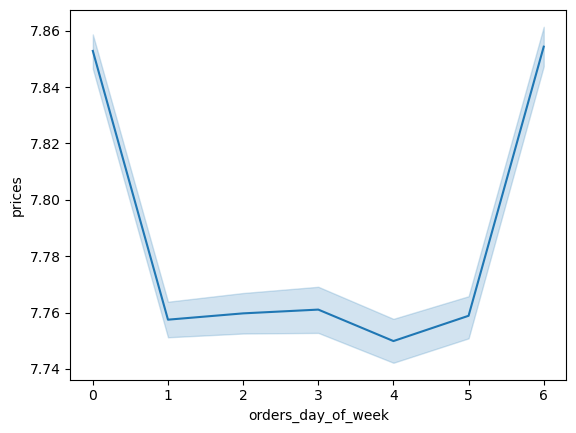

In [52]:
#  Create a  Sample 30% Line Chart of 'orders_day_of_week' and 'prices'
line = sns.lineplot(data = df_3, x = 'orders_day_of_week', y = 'prices')

In [53]:
# Exporting the line chart of 'orders_day_of_week' and 'prices'
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_day_of_week.png'))

## "Check the connections between age and number of dependents (if there is a connection or not)"

In [54]:
# Create the list with the random numbers
# Create the seed(4)
np.random.seed(4)

In [55]:
# Create a list holding True/False values to the test the np.random.rand() <= 0.7
dev = np.random.rand(len(df_merged_all)) <= 0.7

In [56]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [57]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [58]:
# Store two sample in the dataframes big: 70% and small: 30%
big = df_merged_all[dev]
small = df_merged_all[~dev]

In [59]:
# Checking the result of expected in two sample susets

In [60]:
len(df_merged_all)

32404859

In [61]:
len(big) + len(small)

32404859

In [62]:
df_4 = small[['number_of_dependants', 'Age']]

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


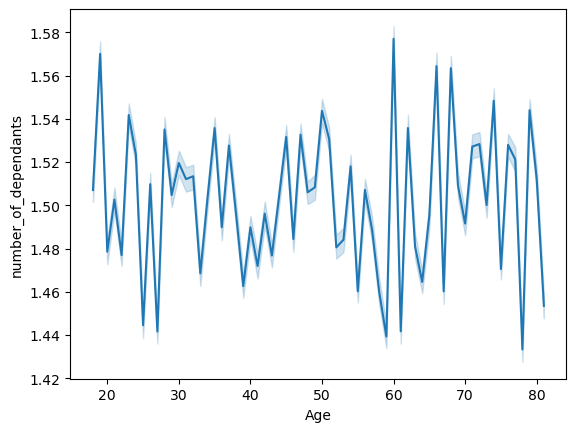

In [63]:
#  Create a Line Chart for 30% sample of 'orders_day_of_week' and 'prices' column
line = sns.lineplot(data = df_4, x = 'Age', y = 'number_of_dependants')

## The above line chart represents a random distribution of the number of dependents by age, but it does not show a correlation between age and number of dependants.

In [64]:
# Exporting the line chart of 'Age and Number_of_dependants' and 'prices'
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_Age_by_number_of_dependants.png'))

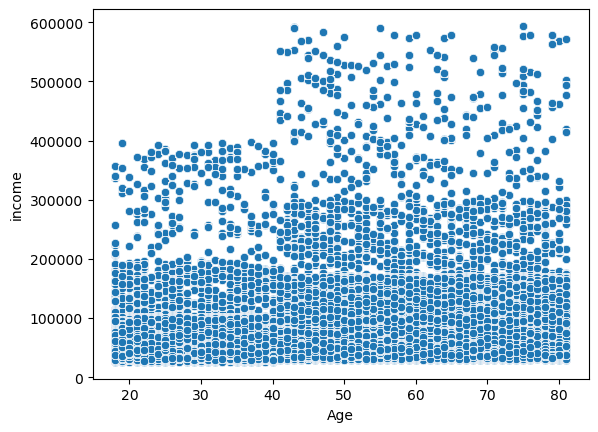

In [65]:
# Creating  a scatterplot to check the connection between Age and Income
scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = df_merged_all)

## The scatterplot shows that the majority of incomes across all age categories are less than 200,000. However, the maximum income for those under the age of 40 is less than 400,000.  For ages over 40, there is a significant concentration of incomes between 200K and 300K, and incomes can go as high as 600K.

In [66]:
# Exporting the Scatterplot chart of 'Age and income' 
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_Age_income.png'))